# Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.utils import resample
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
import warnings
warnings.filterwarnings('ignore')
import os

In [3]:
df=pd.read_csv("weatherAUS.csv")

In [4]:
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8420,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
8421,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
8422,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
8423,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


In [5]:
df['Date']=pd.to_datetime(df['Date'])
df['year']=df['Date'].dt.year
df['month']=df['Date'].dt.month
df['day']=df['Date'].dt.day
df.drop(['Date'],axis=1,inplace=True)

# EDA

In [6]:
df.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,year,month,day
0,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,...,1007.1,8.0,NaN,16.9,21.8,No,No,2008,12,1
1,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,...,1007.8,NaN,NaN,17.2,24.3,No,No,2008,12,2
2,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,...,1008.7,NaN,2.0,21.0,23.2,No,No,2008,12,3
3,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,...,1012.8,NaN,NaN,18.1,26.5,No,No,2008,12,4
4,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,...,1006.0,7.0,8.0,17.8,29.7,No,No,2008,12,5


In [7]:
df.shape

(8425, 25)

In [8]:
#missing value 
df.nunique()

Location          12
MinTemp          285
MaxTemp          331
Rainfall         250
Evaporation      116
Sunshine         140
WindGustDir       16
WindGustSpeed     52
WindDir9am        16
WindDir3pm        16
WindSpeed9am      34
WindSpeed3pm      35
Humidity9am       90
Humidity3pm       94
Pressure9am      384
Pressure3pm      374
Cloud9am           9
Cloud3pm           9
Temp9am          304
Temp3pm          328
RainToday          2
RainTomorrow       2
year              10
month             12
day               31
dtype: int64

In [9]:
df.isnull().sum()

Location            0
MinTemp            75
MaxTemp            60
Rainfall          240
Evaporation      3512
Sunshine         3994
WindGustDir       991
WindGustSpeed     991
WindDir9am        829
WindDir3pm        308
WindSpeed9am       76
WindSpeed3pm      107
Humidity9am        59
Humidity3pm       102
Pressure9am      1309
Pressure3pm      1312
Cloud9am         2421
Cloud3pm         2455
Temp9am            56
Temp3pm            96
RainToday         240
RainTomorrow      239
year                0
month               0
day                 0
dtype: int64

In [10]:
df.dtypes

Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
RainTomorrow      object
year               int64
month              int64
day                int64
dtype: object

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8425 entries, 0 to 8424
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Location       8425 non-null   object 
 1   MinTemp        8350 non-null   float64
 2   MaxTemp        8365 non-null   float64
 3   Rainfall       8185 non-null   float64
 4   Evaporation    4913 non-null   float64
 5   Sunshine       4431 non-null   float64
 6   WindGustDir    7434 non-null   object 
 7   WindGustSpeed  7434 non-null   float64
 8   WindDir9am     7596 non-null   object 
 9   WindDir3pm     8117 non-null   object 
 10  WindSpeed9am   8349 non-null   float64
 11  WindSpeed3pm   8318 non-null   float64
 12  Humidity9am    8366 non-null   float64
 13  Humidity3pm    8323 non-null   float64
 14  Pressure9am    7116 non-null   float64
 15  Pressure3pm    7113 non-null   float64
 16  Cloud9am       6004 non-null   float64
 17  Cloud3pm       5970 non-null   float64
 18  Temp9am 

# skewness

In [12]:
df.skew()

MinTemp          -0.089588
MaxTemp           0.379297
Rainfall         13.028837
Evaporation      10.710605
Sunshine         -0.519717
WindGustSpeed     0.711103
WindSpeed9am      0.956250
WindSpeed3pm      0.491069
Humidity9am      -0.255843
Humidity3pm       0.117563
Pressure9am      -0.022133
Pressure3pm      -0.009385
Cloud9am         -0.309417
Cloud3pm         -0.232598
Temp9am          -0.014699
Temp3pm           0.395061
year              0.418663
month             0.039388
day               0.004260
dtype: float64

In [13]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,year,month,day
count,8350.000000,8365.000000,8185.000000,4913.000000,4431.000000,7434.000000,8349.000000,8318.000000,8366.000000,8323.000000,7116.000000,7113.000000,6004.000000,5970.000000,8369.000000,8329.000000,8425.000000,8425.000000,8425.000000
mean,13.193305,23.859976,2.805913,5.389395,7.632205,40.174469,13.847646,18.533662,67.822496,51.249790,1017.640233,1015.236075,4.566622,4.503183,17.762015,22.442934,2012.102433,6.442136,15.741958
std,5.403596,6.136408,10.459379,5.044484,3.896235,14.665721,10.174579,9.766986,16.833283,18.423774,6.828699,6.766681,2.877658,2.731659,5.627035,5.980020,2.473137,3.437994,8.787354
min,-2.000000,8.200000,0.000000,0.000000,0.000000,7.000000,0.000000,0.000000,10.000000,6.000000,989.800000,982.900000,0.000000,0.000000,1.900000,7.300000,2008.000000,1.000000,1.000000
25%,9.200000,19.300000,0.000000,2.600000,4.750000,30.000000,6.000000,11.000000,56.000000,39.000000,1013.000000,1010.400000,1.000000,2.000000,13.800000,18.000000,2010.000000,3.000000,8.000000
50%,13.300000,23.300000,0.000000,4.600000,8.700000,39.000000,13.000000,19.000000,68.000000,51.000000,1017.700000,1015.300000,5.000000,5.000000,17.800000,21.900000,2011.000000,6.000000,16.000000
75%,17.400000,28.000000,1.000000,7.000000,10.700000,50.000000,20.000000,24.000000,80.000000,63.000000,1022.300000,1019.800000,7.000000,7.000000,21.900000,26.400000,2014.000000,9.000000,23.000000
max,28.500000,45.500000,371.000000,145.000000,13.900000,107.000000,63.000000,83.000000,100.000000,99.000000,1039.000000,1036.000000,8.000000,8.000000,39.400000,44.100000,2017.000000,12.000000,31.000000


In [14]:
df['RainToday'].replace({'No':0 , 'Yes':1}, inplace=True)
df['RainTomorrow'].replace({'No':0 , 'Yes':1}, inplace=True)
df.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,year,month,day
0,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,...,1007.1,8.0,NaN,16.9,21.8,0.0,0.0,2008,12,1
1,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,...,1007.8,NaN,NaN,17.2,24.3,0.0,0.0,2008,12,2
2,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,...,1008.7,NaN,2.0,21.0,23.2,0.0,0.0,2008,12,3
3,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,...,1012.8,NaN,NaN,18.1,26.5,0.0,0.0,2008,12,4
4,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,...,1006.0,7.0,8.0,17.8,29.7,0.0,0.0,2008,12,5


<AxesSubplot:>

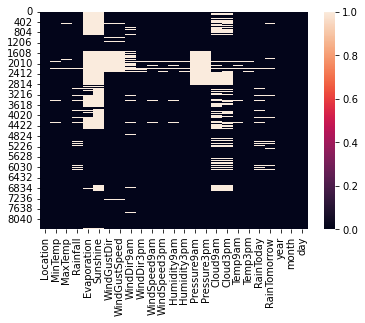

In [15]:
sns.heatmap(df.isnull())

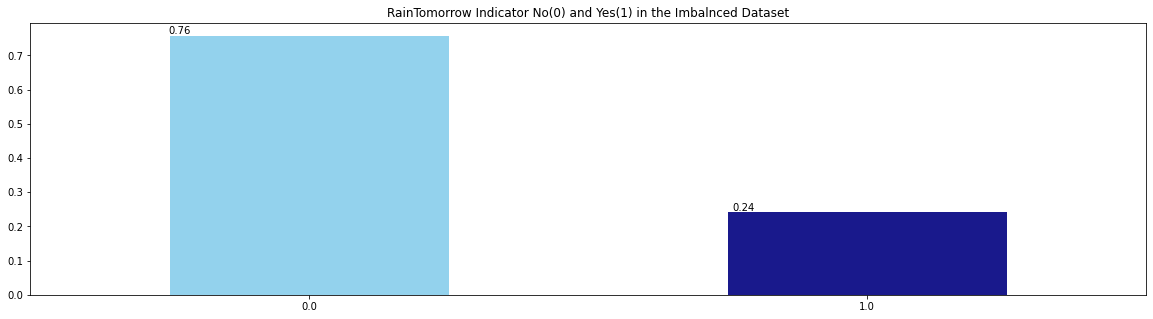

In [16]:
fig=plt.figure(figsize=(20,5))
ax=df.RainTomorrow.value_counts(normalize=True).plot(kind='bar',color= ['skyblue','navy'], alpha = 0.9, rot=0)
plt.title('RainTomorrow Indicator No(0) and Yes(1) in the Imbalnced Dataset')
for p in ax.patches:
    ax.annotate(str(round(p.get_height(),2)),(p.get_x()* 1.01,p.get_height()*1.01))
plt.show()   

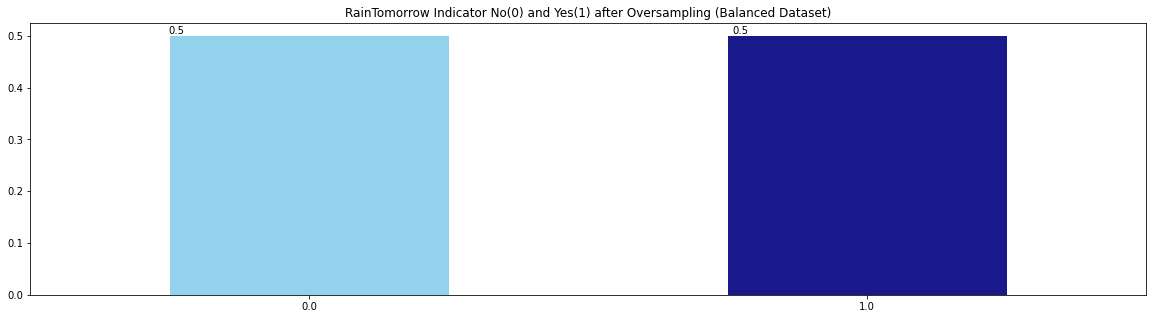

In [17]:
no= df[df.RainTomorrow==0]
yes=df[df.RainTomorrow==1]
yes_oversampled=resample(yes,replace=True, n_samples=len(no),random_state=42)
oversampled=pd.concat([no,yes_oversampled])

fig=plt.figure(figsize=(20,5))
ax=oversampled.RainTomorrow.value_counts(normalize=True).plot(kind='bar', color= ['skyblue','navy'], alpha = 0.9, rot=0)
plt.title('RainTomorrow Indicator No(0) and Yes(1) after Oversampling (Balanced Dataset)')
for p in ax.patches:
    ax.annotate(str(round(p.get_height(),2)),(p.get_x()* 1.01,p.get_height()*1.01))
plt.show()   

# Missing Data Pattern in Training Data

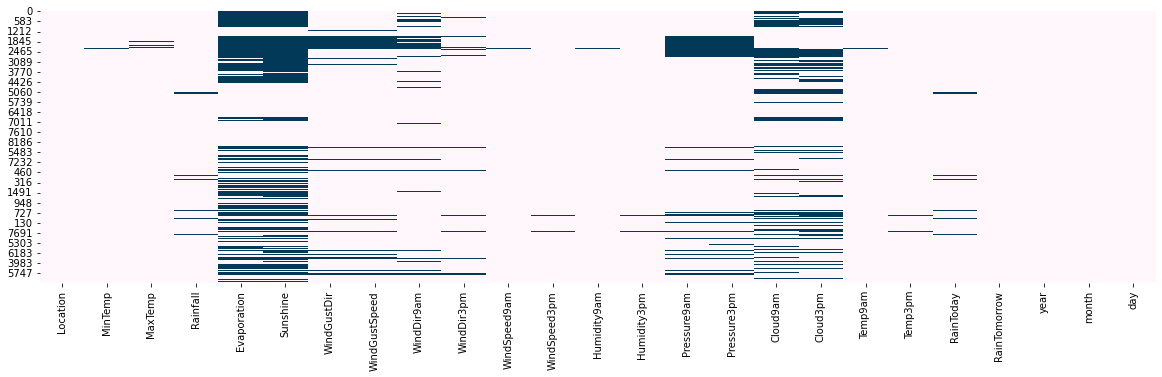

In [18]:
plt.figure(figsize=(20,5))
sns.heatmap(oversampled.isnull(),  cbar=False,  cmap='PuBu')
plt.show()

In [19]:
total=oversampled.isnull().sum().sort_values(ascending=False)
percent=(oversampled.isnull().sum()/oversampled.isnull().count()).sort_values(ascending=False)
missing=pd.concat([total,percent],axis=1,keys=['Total','Percent',])
missing.head()

,Total,Percent
Sunshine,5929,0.478531
Evaporation,5202,0.419855
Cloud9am,3216,0.259564
Cloud3pm,3205,0.258676
Pressure3pm,1945,0.156981


In [20]:
oversampled.select_dtypes(include=['object']).columns

Index(['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm'], dtype='object')

In [21]:
#Impute categorical var with Mode

oversampled['Location']=oversampled['Location'].fillna(oversampled['Location'].mode()[0])
oversampled['WindGustDir']=oversampled['WindGustDir'].fillna(oversampled['WindGustDir'].mode()[0])
oversampled['WindDir9am']=oversampled['WindDir9am'].fillna(oversampled['WindDir9am'].mode()[0])
oversampled['WindDir3pm']=oversampled['WindDir3pm'].fillna(oversampled['WindDir3pm'].mode()[0])

# Convert categorical features to continuous features with Label Encoding

In [22]:
lencoders={}
for col in oversampled.select_dtypes(include=['object']).columns:
    lencoders[col]=LabelEncoder()
    oversampled[col]=lencoders[col].fit_transform(oversampled[col])

# Multiple Imputation by Chained Equations

In [23]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
MiceImputed = oversampled.copy(deep=True) 
mice_imputer = IterativeImputer()
MiceImputed.iloc[:, :] = mice_imputer.fit_transform(oversampled)

# Detecting outliers with IQR

In [24]:
Q1=MiceImputed.quantile(0.25)
Q3=MiceImputed.quantile(0.75)
IQR=Q3-Q1
print(IQR)

Location          5.000000
MinTemp           8.200000
MaxTemp           8.500000
Rainfall          3.200000
Evaporation       4.200000
Sunshine          6.381775
WindGustDir       9.000000
WindGustSpeed    20.000000
WindDir9am        9.000000
WindDir3pm        7.000000
WindSpeed9am     13.000000
WindSpeed3pm     15.000000
Humidity9am      24.000000
Humidity3pm      27.998659
Pressure9am       8.000000
Pressure3pm       8.000000
Cloud9am          4.007508
Cloud3pm          4.000000
Temp9am           8.000000
Temp3pm           8.200000
RainToday         1.000000
RainTomorrow      1.000000
year              4.000000
month             5.000000
day              15.000000
dtype: float64


# Removing outliers from the dataset

In [25]:
MiceImputed = MiceImputed[~((MiceImputed <(Q1-1.5*IQR))  |(MiceImputed >(Q3+1.5*IQR))).any(axis=1)]
MiceImputed.shape

(9733, 25)

# Correlation Heatmap

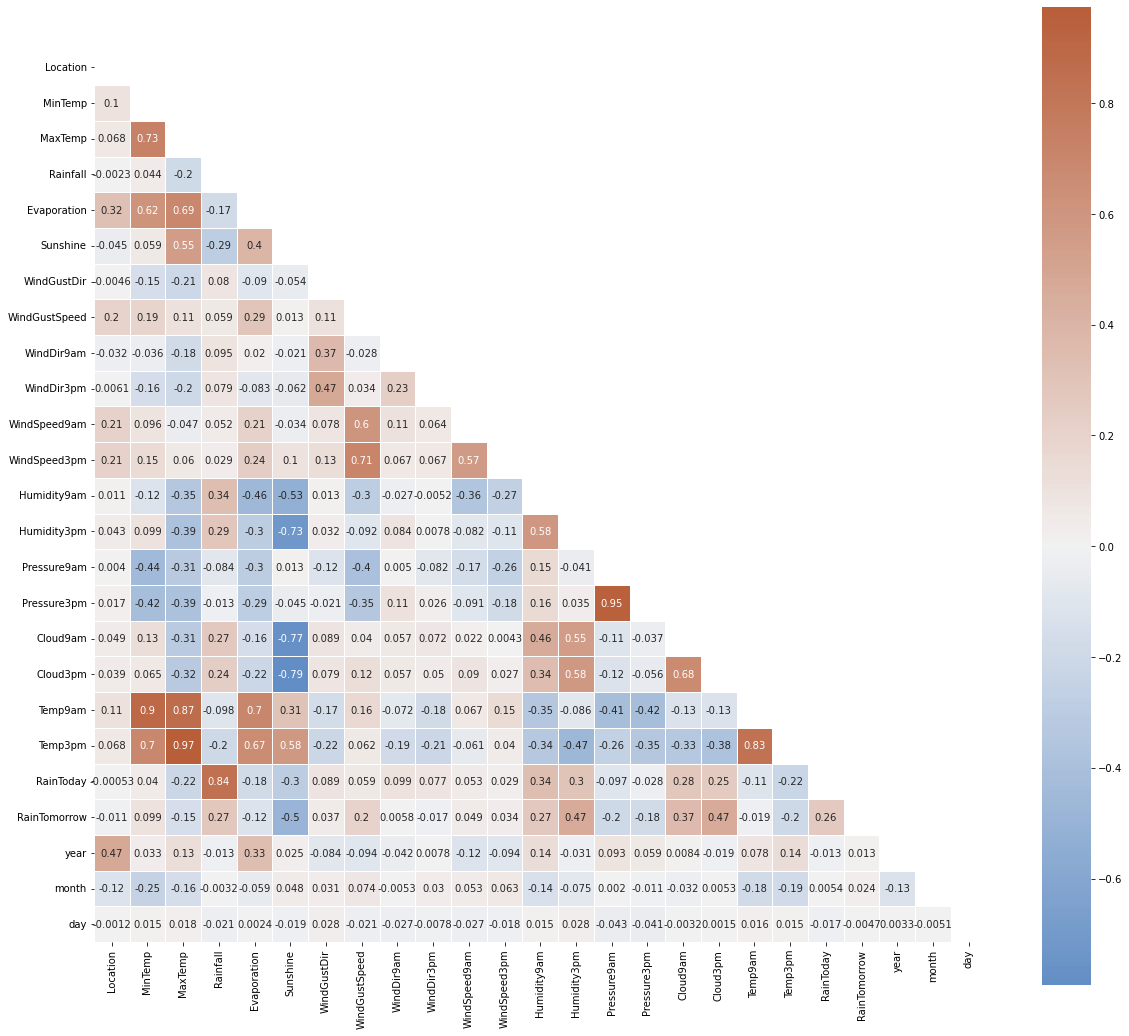

In [26]:
corr=MiceImputed.corr()
mask=np.triu(np.ones_like(corr,dtype=np.bool))
f,ax=plt.subplots(figsize=(20,20))
cmap=sns.diverging_palette(250,25, as_cmap=True)
sns.heatmap(corr,mask=mask,cmap=cmap, vmax=None,center=0,square=True,annot=True,linewidths=0.5,cbar_kws={'shrink':.9})
plt.show()

# pairplot

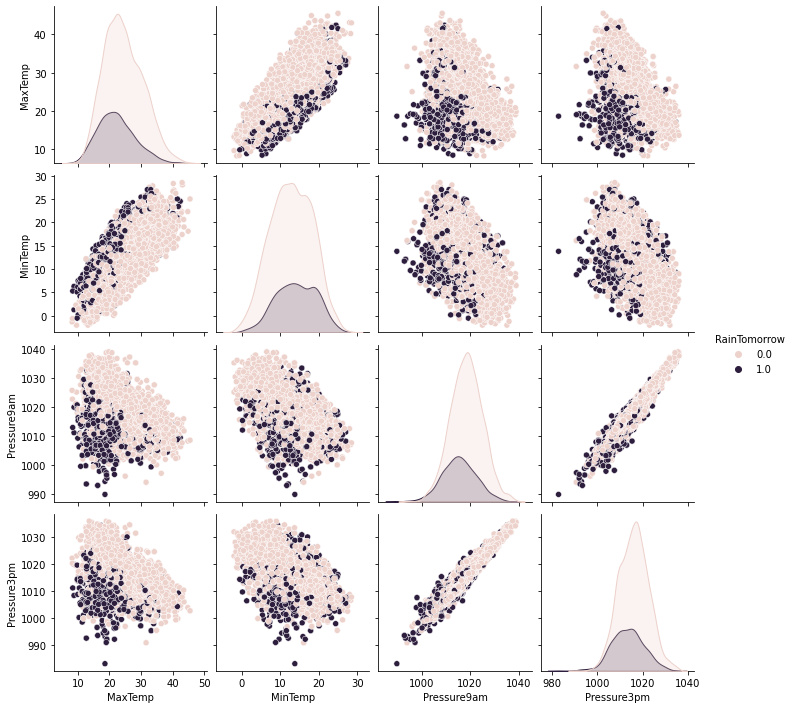

In [27]:
sns.pairplot(df,vars= ('MaxTemp','MinTemp','Pressure9am','Pressure3pm'),hue='RainTomorrow')
plt.show()

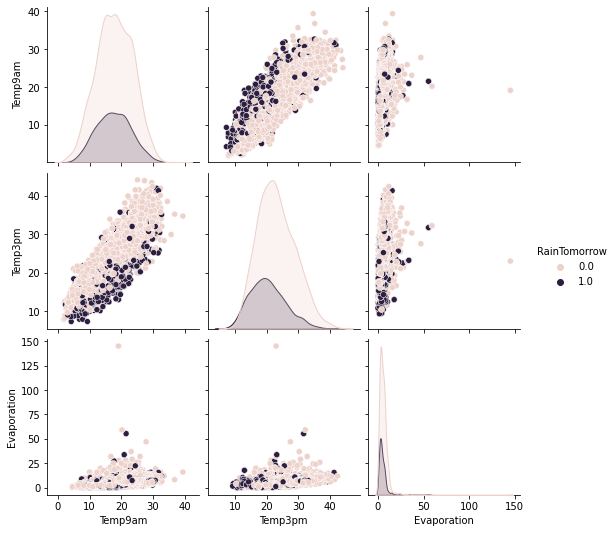

In [28]:
sns.pairplot( df, vars=('Temp9am', 'Temp3pm', 'Evaporation'), hue='RainTomorrow' )
plt.show()

# countplot

<AxesSubplot:xlabel='RainTomorrow', ylabel='count'>

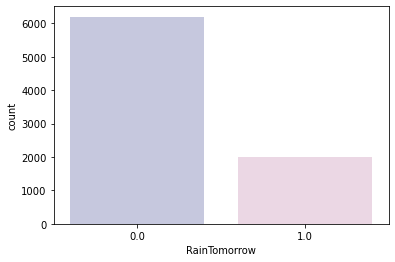

In [29]:
cols= ["#C2C4E2","#EED4E5"]
sns.countplot(x= df["RainTomorrow"], palette= cols)

<AxesSubplot:xlabel='Evaporation', ylabel='count'>

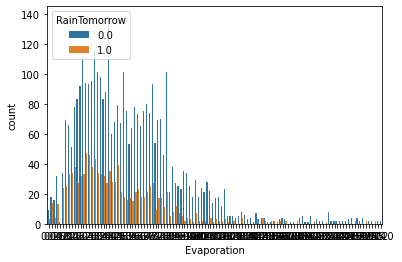

In [30]:
sns.countplot(x='Evaporation',hue="RainTomorrow",data=df)

<AxesSubplot:xlabel='Sunshine', ylabel='count'>

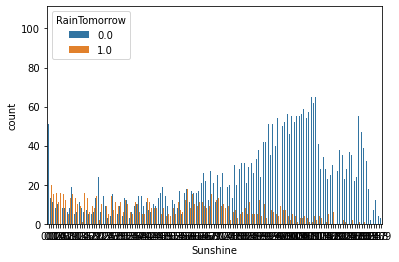

In [31]:
sns.countplot(x='Sunshine',hue="RainTomorrow",data=df)

<AxesSubplot:xlabel='RainToday', ylabel='count'>

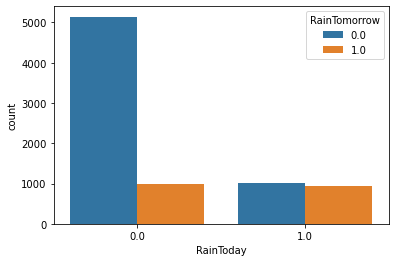

In [32]:
sns.countplot(x='RainToday',hue="RainTomorrow",data=df)

<AxesSubplot:xlabel='Evaporation', ylabel='count'>

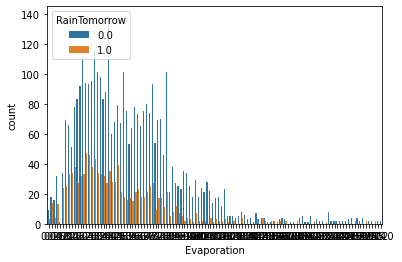

In [33]:
sns.countplot(x="Evaporation",hue="RainTomorrow",data=df)

# Standarizing data

In [34]:
from sklearn import preprocessing
r_scaler=preprocessing.MinMaxScaler()
r_scaler.fit(MiceImputed)
modified_data=pd.DataFrame(r_scaler.transform(MiceImputed),index=MiceImputed.index,columns=MiceImputed.columns)

In [35]:
# Feature Importance using Filter Method (Chi-Square)

from sklearn.feature_selection import SelectKBest,chi2
x=modified_data.loc[:,modified_data.columns!='RainTomorrow']
y=modified_data[['RainTomorrow']]
selector=SelectKBest(chi2, k=10)
selector.fit(x,y)
x_new=selector.transform(x)
print(x.columns[selector.get_support(indices=True)])

Index(['Rainfall', 'Sunshine', 'WindGustSpeed', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Cloud9am', 'Cloud3pm', 'Temp3pm', 'RainToday'],
      dtype='object')


In [36]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier as rf

x=MiceImputed.drop('RainTomorrow',axis=1)
y=MiceImputed['RainTomorrow']
selector=SelectFromModel(rf(n_estimators=100, random_state=0))
selector.fit(x,y)
support=selector.get_support()
features=x.loc[:,support].columns.tolist()
print(features)
print(rf(n_estimators=100, random_state=0).fit(x,y).feature_importances_)

['Sunshine', 'WindGustSpeed', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm']
[0.02418963 0.03313076 0.03276269 0.03738755 0.03500645 0.100323
 0.02220111 0.05132293 0.02493261 0.02592364 0.02520161 0.02931005
 0.04064212 0.11352973 0.05166752 0.05022183 0.04645333 0.09714772
 0.03302874 0.03677058 0.01843198 0.02058738 0.02175667 0.02807039]


# train and test split

In [37]:
features = MiceImputed[['Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustDir', 
                       'WindGustSpeed', 'WindDir9am', 'WindDir3pm', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 
                       'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 
                       'RainToday']]
target = MiceImputed['RainTomorrow']

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(features,target,test_size=0.2,random_state=42,stratify=target)

In [38]:
def plot_roc_cur(fper,tper):
    plt.plot(fper,tper,color='orange',label='ROC')
    plt.plot([0,1],[0,1],color='darkblue',linestyle='--')
    plt.xlabel('False positive rate')
    plt.ylabel('True positive rate')
    plt.title('Reciver operating Characteristic(ROC) Curve')
    plt.legend()
    plt.show()

In [39]:
import time
from sklearn.metrics import accuracy_score, roc_auc_score, cohen_kappa_score, plot_confusion_matrix, roc_curve, classification_report
def run_model(model,x_train,y_train,x_test,y_test, verbose=True):
    t0=time.time()
    if verbose==False:
        model.fit(x_train,y_train,verbose=0)
    else:
        model.fit(x_train,y_train)
        y_pred=model.predict(x_test)
        accuracy=accuracy_score(y_test,y_pred)
        roc_auc=roc_auc_score(y_test,y_pred)
        coh_kap=cohen_kappa_score(y_test,y_pred)
        time_taken=time.time()-t0
        print("Accuracy = {}".format(accuracy))
        print("ROC Area under Curve = {}".format(roc_auc))
        print("Cohen's Kappa = {}".format(coh_kap))
        print("Time taken = {}".format(time_taken))
        print(classification_report(y_test,y_pred,digits=5))
        
        
        probs=model.predict_proba(x_test)
        probs=probs[:,1]
        fper,tper,thresholds=roc_curve(y_test,probs)
        plot_roc_cur(fper,tper)
        plot_confusion_matrix(model,x_test,y_test,cmap=plt.cm.Blues,normalize='all')

    return model, accuracy, roc_auc, coh_kap, time_taken